In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:
df_ttd = pd.read_csv(r"C:\Users\hi\Downloads\PHONE PE\Extracted_tables\6 Top Transaction Districts.csv")

* Data Profiling

In [4]:
print("shape",df_ttd.shape)
display(df_ttd.head(5))
print("_______________________________________________________________________________________________________")
print("---- CHECKING NULL VALUES ----")
print(df_ttd.isnull().sum()) 
print("_______________________________________________________________________________________________________")
print("---- DROP NULL VALUES ----")
display(df_ttd.drop_duplicates())
print("_______________________________________________________________________________________________________")
print("---- SUMMARY STATISTICS ----")
display(df_ttd.describe())
print("_______________________________________________________________________________________________________")
print("---- CHECKING DATATYPES ----")
print(df_ttd.dtypes)

shape (7696, 6)


,State,Year,Quarter,District,Count,Amount
0,Andaman And Nicobar Islands,2018,1,south andaman,5688,1.256025e+07
1,Andaman And Nicobar Islands,2018,1,nicobars,528,1.139849e+06
2,Andaman And Nicobar Islands,2018,1,north and middle andaman,442,9.316631e+05
3,Andaman And Nicobar Islands,2018,2,south andaman,9395,2.394824e+07
4,Andaman And Nicobar Islands,2018,2,nicobars,1120,3.072437e+06


_______________________________________________________________________________________________________
---- CHECKING NULL VALUES ----
State       0
Year        0
Quarter     0
District    0
Count       0
Amount      0
dtype: int64
_______________________________________________________________________________________________________
---- DROP NULL VALUES ----


,State,Year,Quarter,District,Count,Amount
0,Andaman And Nicobar Islands,2018,1,south andaman,5688,1.256025e+07
1,Andaman And Nicobar Islands,2018,1,nicobars,528,1.139849e+06
2,Andaman And Nicobar Islands,2018,1,north and middle andaman,442,9.316631e+05
3,Andaman And Nicobar Islands,2018,2,south andaman,9395,2.394824e+07
4,Andaman And Nicobar Islands,2018,2,nicobars,1120,3.072437e+06
...,...,...,...,...,...,...
7691,West Bengal,2024,2,maldah,52271735,9.043206e+10
7692,West Bengal,2024,2,nadia,49543213,8.588943e+10
7693,West Bengal,2024,2,howrah,48742679,7.969588e+10
7694,West Bengal,2024,2,paschim medinipur,47935332,7.566704e+10


_______________________________________________________________________________________________________
---- SUMMARY STATISTICS ----


,Year,Quarter,Count,Amount
count,7696.000000,7696.000000,7.696000e+03,7.696000e+03
mean,2020.769231,2.423077,1.751965e+07,2.589218e+10
std,1.887483,1.115457,6.162504e+07,7.914003e+10
min,2018.000000,1.000000,4.420000e+02,5.471802e+05
25%,2019.000000,1.000000,2.517252e+05,4.658255e+08
50%,2021.000000,2.000000,2.009392e+06,3.396434e+09
75%,2022.000000,3.000000,1.217311e+07,2.065419e+10
max,2024.000000,4.000000,1.497173e+09,1.753799e+12


_______________________________________________________________________________________________________
---- CHECKING DATATYPES ----
State        object
Year          int64
Quarter       int64
District     object
Count         int64
Amount      float64
dtype: object


In [5]:
df_ttd1 = df_ttd.copy()
df_ttd1['Year']=df_ttd1['Year'].astype(str)
df_ttd1['Quarter']=df_ttd1['Quarter'].astype(str)
display(df_ttd1.dtypes)

State        object
Year         object
Quarter      object
District     object
Count         int64
Amount      float64
dtype: object

* Univarient Analysis

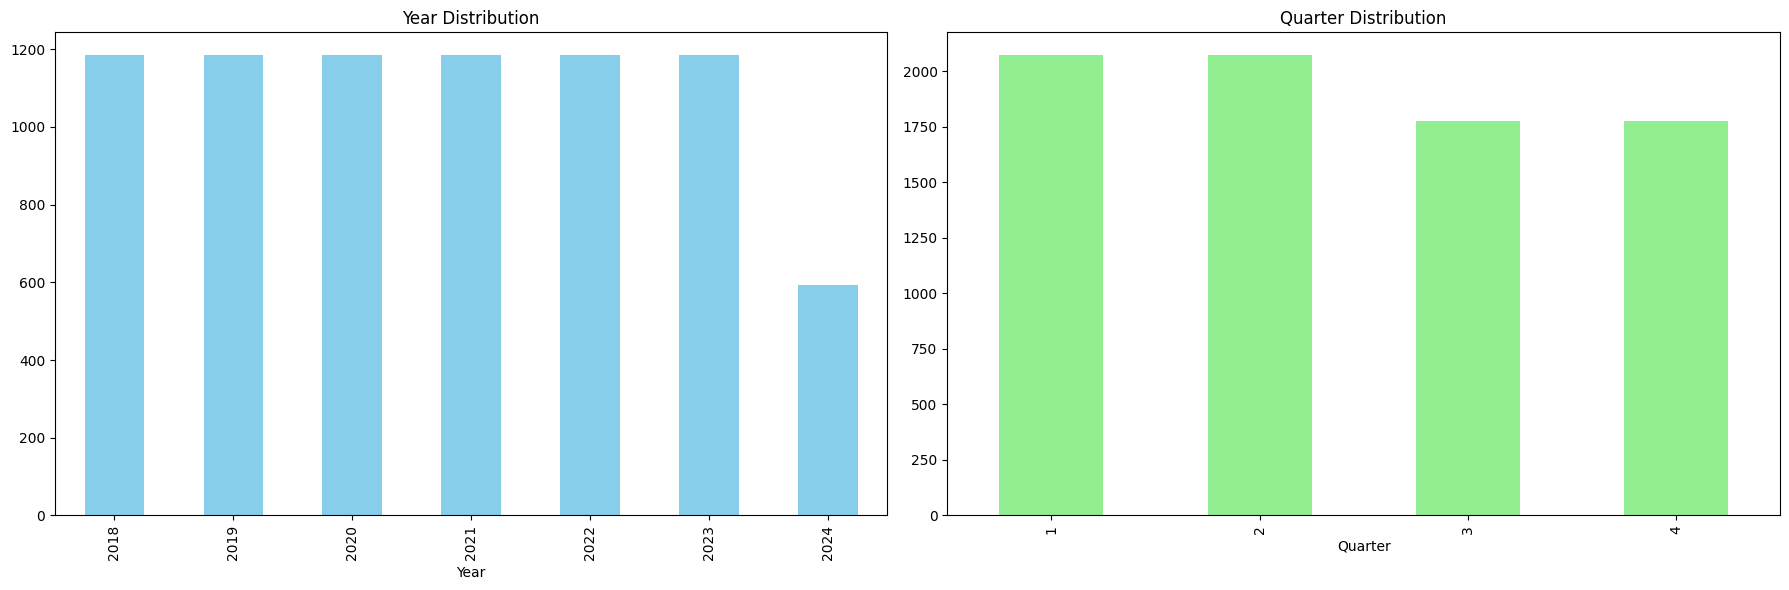

In [6]:
fig, axs = plt.subplots(1, 2, figsize=(18, 6))
df_ttd1['Year'].value_counts().plot.bar(ax=axs[0], color='skyblue')
axs[0].set_title('Year Distribution')

df_ttd1['Quarter'].value_counts().plot.bar(ax=axs[1], color='lightgreen')
axs[1].set_title('Quarter Distribution')

plt.tight_layout()
plt.show()

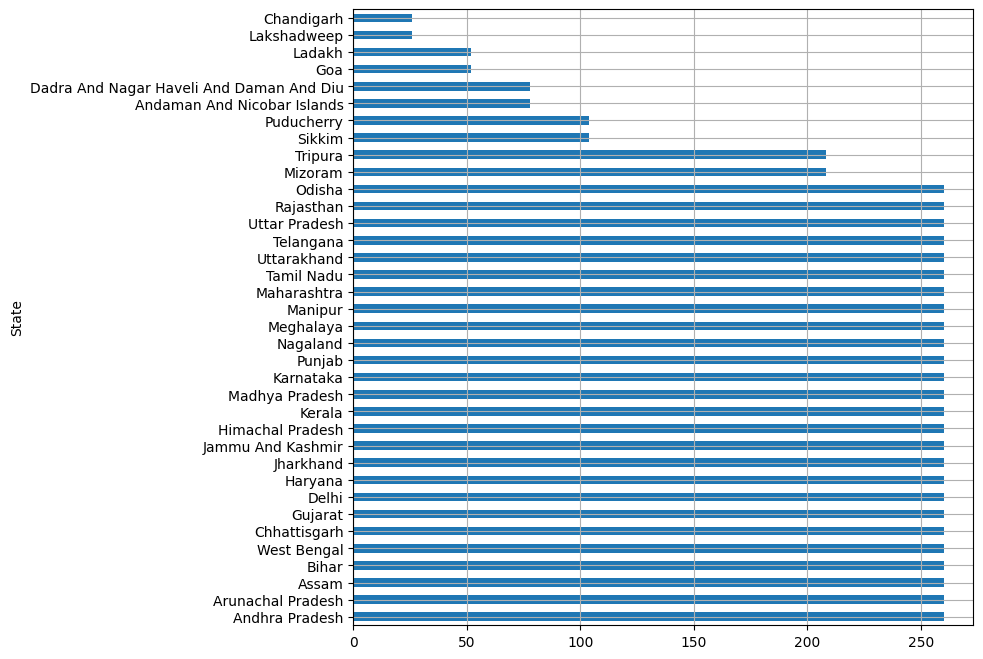

In [7]:
plt.figure(figsize=(8, 8))
df_ttd1['State'].value_counts().plot.barh()
plt.grid(True)

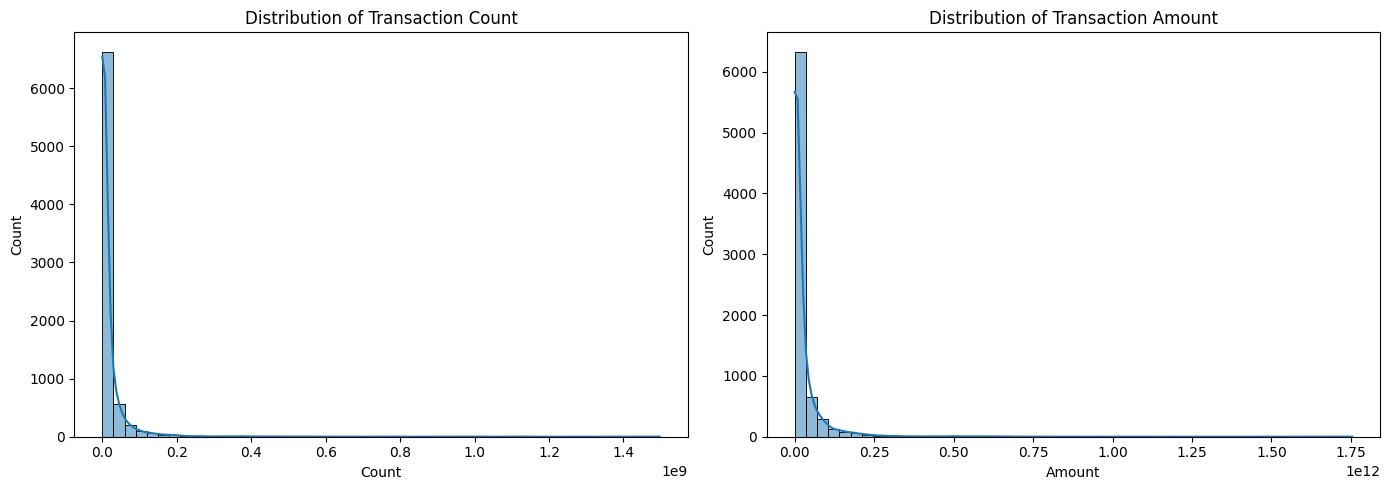

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
 
sns.histplot(df_ttd1['Count'], bins=50, kde=True, ax=axes[0])
axes[0].set_title('Distribution of Transaction Count')

sns.histplot(df_ttd1['Amount'], bins=50, kde=True, ax=axes[1])
axes[1].set_title('Distribution of Transaction Amount')

plt.tight_layout()
plt.show()

* Bivarient & Multivarient Analysis

In [9]:
#correlation analysis between numerical columns
df_numeric = df_ttd1.select_dtypes(include=[float, int])
df1 = df_numeric.corr()
print(df1)

           Count    Amount
Count   1.000000  0.980679
Amount  0.980679  1.000000


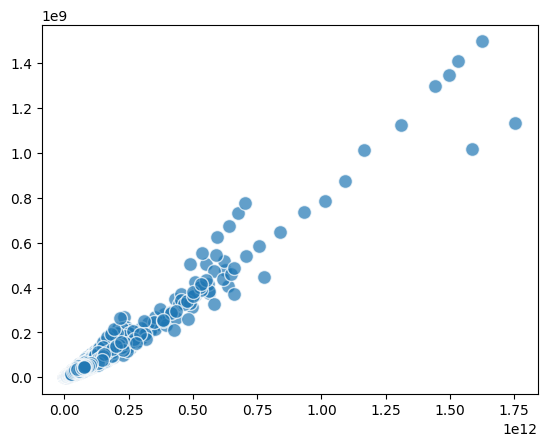

In [10]:
# Relation between transaction count & transaction amount 
plt.scatter( df_ttd1['Amount'],df_ttd1['Count'], alpha=0.7, edgecolors='w', s=100)

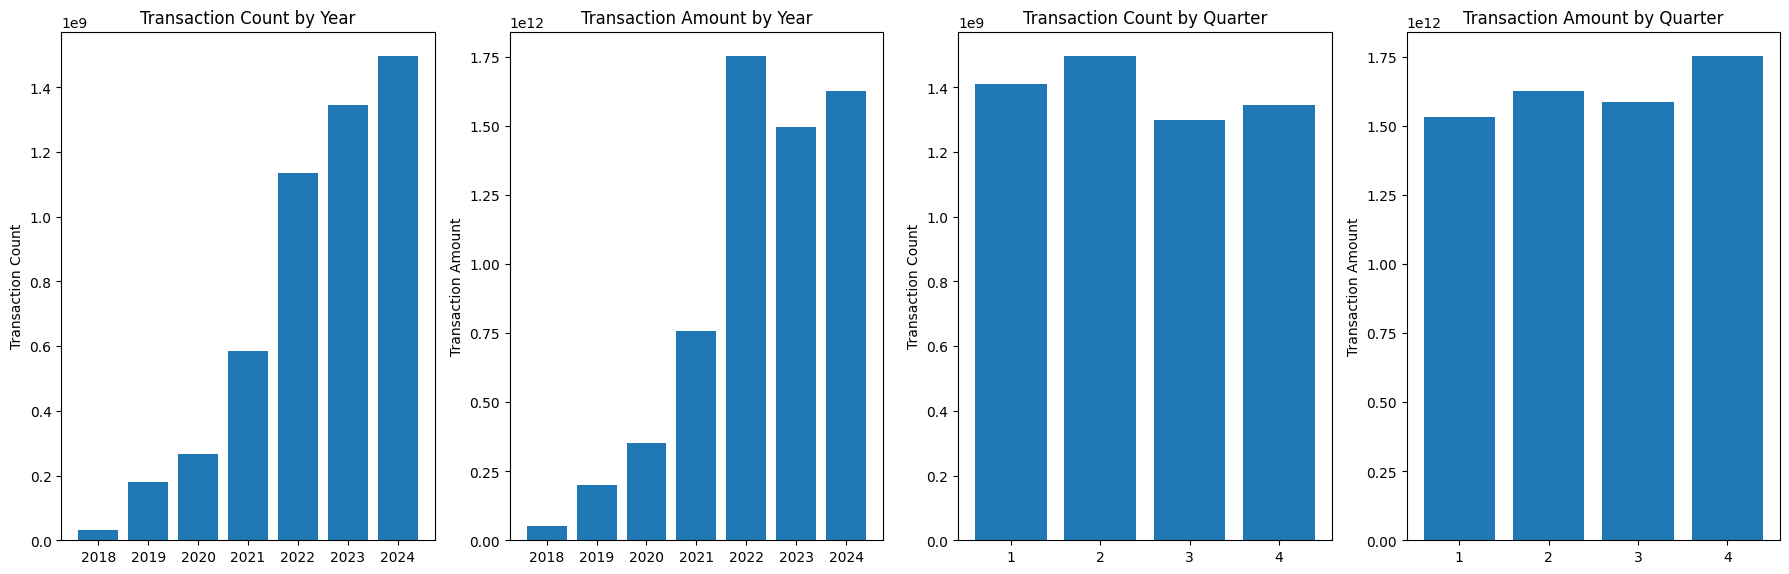

In [11]:
fig, axes = plt.subplots(1, 4, figsize=(18, 6))

axes[0].bar(df_ttd1["Year"], df_ttd1["Count"])
axes[0].set_title('Transaction Count by Year')
axes[0].set_ylabel('Transaction Count')

axes[1].bar(df_ttd1["Year"], df_ttd1["Amount"])
axes[1].set_title('Transaction Amount by Year')
axes[1].set_ylabel('Transaction Amount')

axes[2].bar(df_ttd1["Quarter"], df_ttd1["Count"])
axes[2].set_title('Transaction Count by Quarter')
axes[2].set_ylabel('Transaction Count')

axes[3].bar(df_ttd1["Quarter"], df_ttd1["Amount"])
axes[3].set_title('Transaction Amount by Quarter')
axes[3].set_ylabel('Transaction Amount')

plt.tight_layout()
plt.show()

In [12]:
# Creating cross table using groupby
cross_table = df_ttd1.groupby(['State']).agg(
    Total_Transaction_count=('Count', 'sum'),
    Total_Transaction_amount=('Amount', 'sum')
).reset_index()
cross_table = cross_table.sort_values(by='Total_Transaction_amount', ascending=False)

display(cross_table)

,State,Total_Transaction_count,Total_Transaction_amount
31,Telangana,16945945189,2.699069e+13
15,Karnataka,19212365055,2.445085e+13
1,Andhra Pradesh,12754522873,2.431089e+13
20,Maharashtra,18507907363,2.284283e+13
28,Rajasthan,9206100311,1.455852e+13
35,West Bengal,5179594467,9.203437e+12
8,Delhi,6493412478,9.187504e+12
33,Uttar Pradesh,6608899288,9.101649e+12
19,Madhya Pradesh,6488533943,8.735358e+12
4,Bihar,4408546738,7.527306e+12


In [13]:
# Step 1: Calculate the total transaction amount for each state
state_agg = df_ttd1.groupby(['State']).agg(
    Total_Transaction_amount_State=('Amount', 'sum')
).reset_index()

# Step 2: Calculate the total transaction amount for each district within each state
district_agg = df_ttd1.groupby(['State', 'District']).agg(
    Total_Transaction_amount_District=('Amount', 'sum')
).reset_index()

# Step 3: Identify the district with the highest transaction amount for each state
idx = district_agg.groupby(['State'])['Total_Transaction_amount_District'].idxmax()
top_districts = district_agg.loc[idx].rename(columns={'District': 'Top_District'})

# Step 4: Merge the state-level and district-level data
cross_table = state_agg.merge(top_districts[['State', 'Top_District', 'Total_Transaction_amount_District']], on='State')

# Sort by total transaction amount in the state in descending order
cross_table = cross_table.sort_values(by='Total_Transaction_amount_State', ascending=False)

# Display the final table
display(cross_table)

,State,Total_Transaction_amount_State,Top_District,Total_Transaction_amount_District
31,Telangana,2.699069e+13,hyderabad,1.073493e+13
15,Karnataka,2.445085e+13,bengaluru urban,1.639720e+13
1,Andhra Pradesh,2.431089e+13,visakhapatnam,3.606160e+12
20,Maharashtra,2.284283e+13,pune,8.152096e+12
28,Rajasthan,1.455852e+13,jaipur,6.933637e+12
35,West Bengal,9.203437e+12,kolkata,2.298415e+12
8,Delhi,9.187504e+12,central delhi,2.538393e+12
33,Uttar Pradesh,9.101649e+12,lucknow,1.919972e+12
19,Madhya Pradesh,8.735358e+12,bhopal,2.510273e+12
4,Bihar,7.527306e+12,patna,2.703686e+12


In [14]:
df_tud = pd.read_csv(r"C:\Users\hi\Downloads\PHONE PE\Extracted_tables\8 Top User District.csv")

* Data Profiling

In [15]:
print("shape",df_tud.shape)
display(df_tud.head(5))
print("_______________________________________________________________________________________________________")
print("---- CHECKING NULL VALUES ----")
print(df_tud.isnull().sum()) 
print("_______________________________________________________________________________________________________")
print("---- DROP NULL VALUES ----")
display(df_tud.drop_duplicates())
print("_______________________________________________________________________________________________________")
print("---- SUMMARY STATISTICS ----")
display(df_tud.describe())
print("_______________________________________________________________________________________________________")
print("---- CHECKING DATATYPES ----")
print(df_tud.dtypes)

shape (7696, 5)


,State,Year,Quarter,District,Registered_users
0,Andaman And Nicobar Islands,2018,1,south andaman,5846
1,Andaman And Nicobar Islands,2018,1,north and middle andaman,632
2,Andaman And Nicobar Islands,2018,1,nicobars,262
3,Andaman And Nicobar Islands,2018,2,south andaman,8143
4,Andaman And Nicobar Islands,2018,2,north and middle andaman,911


_______________________________________________________________________________________________________
---- CHECKING NULL VALUES ----
State               0
Year                0
Quarter             0
District            0
Registered_users    0
dtype: int64
_______________________________________________________________________________________________________
---- DROP NULL VALUES ----


,State,Year,Quarter,District,Registered_users
0,Andaman And Nicobar Islands,2018,1,south andaman,5846
1,Andaman And Nicobar Islands,2018,1,north and middle andaman,632
2,Andaman And Nicobar Islands,2018,1,nicobars,262
3,Andaman And Nicobar Islands,2018,2,south andaman,8143
4,Andaman And Nicobar Islands,2018,2,north and middle andaman,911
...,...,...,...,...,...
7691,West Bengal,2024,2,howrah,1807232
7692,West Bengal,2024,2,nadia,1737326
7693,West Bengal,2024,2,purba medinipur,1721598
7694,West Bengal,2024,2,paschim medinipur,1558562


_______________________________________________________________________________________________________
---- SUMMARY STATISTICS ----


,Year,Quarter,Registered_users
count,7696.000000,7696.000000,7.696000e+03
mean,2020.769231,2.423077,6.688882e+05
std,1.887483,1.115457,1.138495e+06
min,2018.000000,1.000000,1.680000e+02
25%,2019.000000,1.000000,5.853800e+04
50%,2021.000000,2.000000,3.080335e+05
75%,2022.000000,3.000000,8.442595e+05
max,2024.000000,4.000000,1.812748e+07


_______________________________________________________________________________________________________
---- CHECKING DATATYPES ----
State               object
Year                 int64
Quarter              int64
District            object
Registered_users     int64
dtype: object


In [16]:
df_tud1 = df_tud.copy()
df_tud1['Year']=df_tud1['Year'].astype(str)
df_tud1['Quarter']=df_tud1['Quarter'].astype(str)
display(df_tud1.dtypes)

State               object
Year                object
Quarter             object
District            object
Registered_users     int64
dtype: object

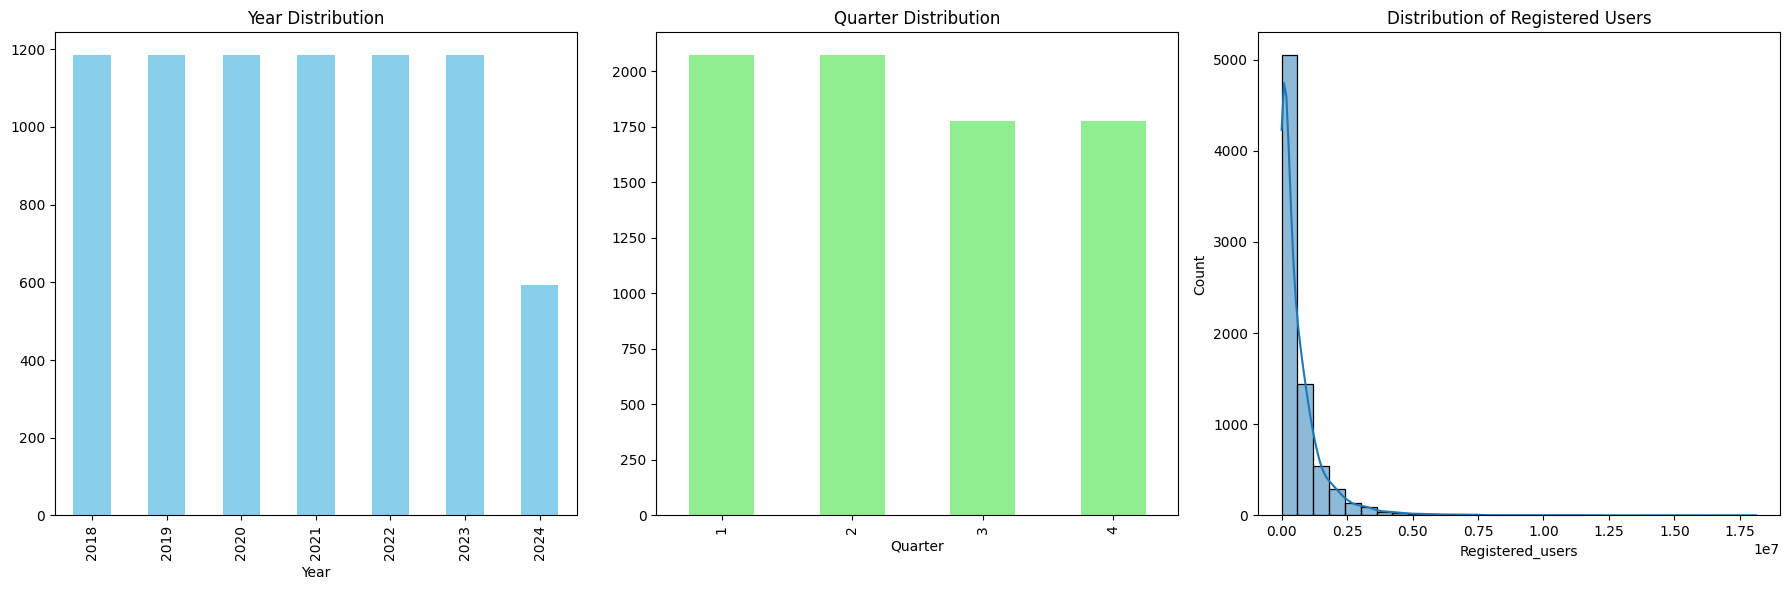

In [17]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6))
df_tud1['Year'].value_counts().plot.bar(ax=axs[0], color='skyblue')
axs[0].set_title('Year Distribution')

df_tud1['Quarter'].value_counts().plot.bar(ax=axs[1], color='lightgreen')
axs[1].set_title('Quarter Distribution')

sns.histplot(df_tud1['Registered_users'], bins=30, kde=True, ax=axs[2])
axs[2].set_title('Distribution of Registered Users')

plt.tight_layout()
plt.show()

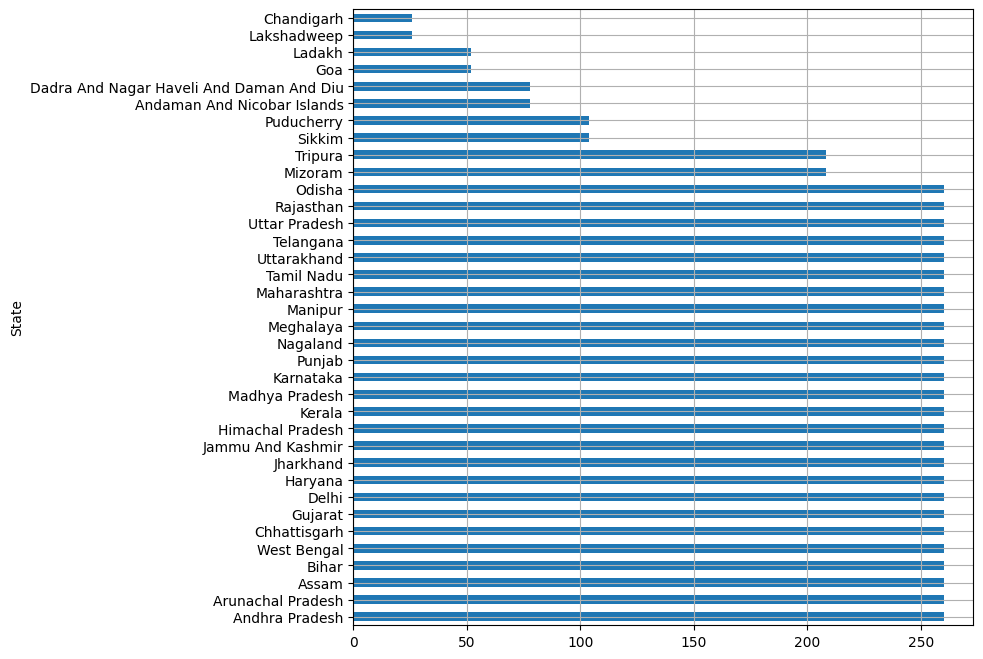

In [18]:
plt.figure(figsize=(8, 8))
df_tud1['State'].value_counts().plot.barh()
plt.grid(True)

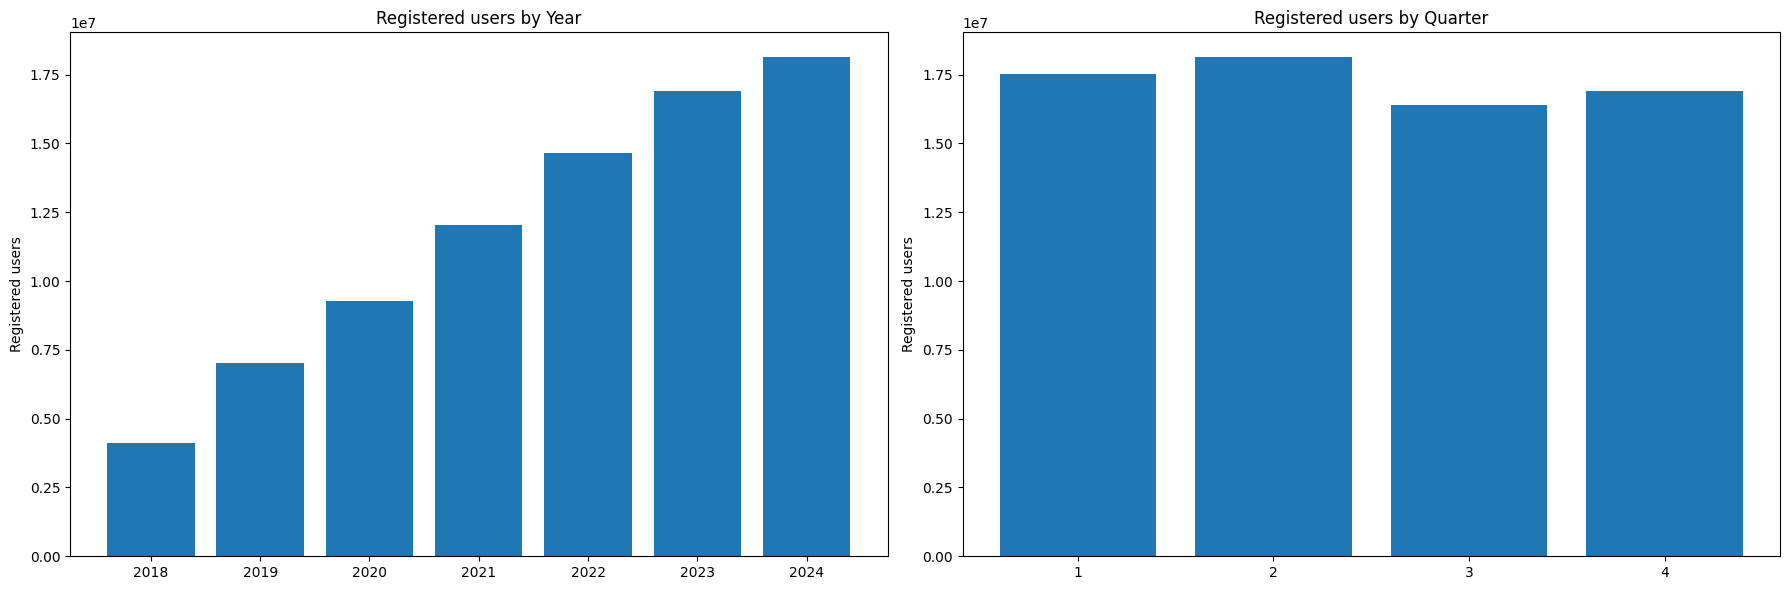

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

axes[0].bar(df_tud1["Year"], df_tud1["Registered_users"])
axes[0].set_title('Registered users by Year')
axes[0].set_ylabel('Registered users')

axes[1].bar(df_tud1["Quarter"], df_tud1["Registered_users"])
axes[1].set_title('Registered users by Quarter')
axes[1].set_ylabel('Registered users')

plt.tight_layout()
plt.show()

In [20]:
# Step 1: Calculate the total number of registered users for each state
state_agg = df_tud1.groupby(['State']).agg(
    Total_Registered_users_State=('Registered_users', 'sum')
).reset_index()

# Step 2: Calculate the total number of registered users for each district within each state
district_agg = df_tud1.groupby(['State', 'District']).agg(
    Total_Registered_users_District=('Registered_users', 'sum')
).reset_index()

# Step 3: Identify the district with the highest number of registered users for each state
idx = district_agg.groupby(['State'])['Total_Registered_users_District'].idxmax()
top_districts = district_agg.loc[idx].rename(columns={'District': 'Top_District'})

# Step 4: Merge the state-level and district-level data
cross_table = state_agg.merge(top_districts[['State', 'Top_District', 'Total_Registered_users_District']], on='State')

# Sort by the total number of registered users in the state in descending order
cross_table = cross_table.sort_values(by='Total_Registered_users_State', ascending=False)

# Display the final table
display(cross_table)


,State,Total_Registered_users_State,Top_District,Total_Registered_users_District
20,Maharashtra,669700907,pune,174219196
15,Karnataka,451289348,bengaluru urban,267995321
1,Andhra Pradesh,429579053,visakhapatnam,64825849
31,Telangana,335044774,hyderabad,90150108
33,Uttar Pradesh,334505443,gautam buddha nagar,59896693
35,West Bengal,324576414,north twenty four parganas,67384909
28,Rajasthan,297068371,jaipur,109148255
10,Gujarat,285358852,ahmadabad,81767310
8,Delhi,271840116,west,42746947
30,Tamil Nadu,266957655,chennai,49561240


In [21]:
df_ttp = pd.read_csv(r"C:\Users\hi\Downloads\PHONE PE\Extracted_tables\7 Top Transaction Pincode.csv")

In [22]:
print("shape",df_ttp.shape)
display(df_ttp.head(5))
print("_______________________________________________________________________________________________________")
print("---- CHECKING NULL VALUES ----")
print(df_ttp.isnull().sum()) 
print("_______________________________________________________________________________________________________")
print("---- DROP NULL VALUES ----")
display(df_ttp.drop_duplicates())
print("_______________________________________________________________________________________________________")
print("---- SUMMARY STATISTICS ----")
display(df_ttp.describe())
print("_______________________________________________________________________________________________________")
print("---- CHECKING DATATYPES ----")
print(df_ttp.dtypes)

shape (9281, 6)


,State,Year,Quarter,Pincode,Count,Amount
0,Andaman And Nicobar Islands,2018,1,744101.0,1622,2.769298e+06
1,Andaman And Nicobar Islands,2018,1,744103.0,1223,2.238042e+06
2,Andaman And Nicobar Islands,2018,1,744102.0,969,3.519060e+06
3,Andaman And Nicobar Islands,2018,1,744105.0,685,1.298561e+06
4,Andaman And Nicobar Islands,2018,1,744104.0,340,1.039715e+06


_______________________________________________________________________________________________________
---- CHECKING NULL VALUES ----
State      0
Year       0
Quarter    0
Pincode    2
Count      0
Amount     0
dtype: int64
_______________________________________________________________________________________________________
---- DROP NULL VALUES ----


,State,Year,Quarter,Pincode,Count,Amount
0,Andaman And Nicobar Islands,2018,1,744101.0,1622,2.769298e+06
1,Andaman And Nicobar Islands,2018,1,744103.0,1223,2.238042e+06
2,Andaman And Nicobar Islands,2018,1,744102.0,969,3.519060e+06
3,Andaman And Nicobar Islands,2018,1,744105.0,685,1.298561e+06
4,Andaman And Nicobar Islands,2018,1,744104.0,340,1.039715e+06
...,...,...,...,...,...,...
9276,West Bengal,2024,2,721301.0,5404541,6.950100e+09
9277,West Bengal,2024,2,732201.0,5321216,1.194881e+10
9278,West Bengal,2024,2,700006.0,4851340,8.331812e+09
9279,West Bengal,2024,2,742202.0,4779726,9.404879e+09


_______________________________________________________________________________________________________
---- SUMMARY STATISTICS ----


,Year,Quarter,Pincode,Count,Amount
count,9281.000000,9281.000000,9279.000000,9.281000e+03,9.281000e+03
mean,2020.769529,2.423230,519414.794482,4.437686e+06,6.348567e+09
std,1.887345,1.115407,247164.651925,2.000465e+07,3.021683e+10
min,2018.000000,1.000000,110001.000000,2.000000e+00,6.025276e+01
25%,2019.000000,1.000000,263153.000000,6.066100e+04,1.240079e+08
50%,2021.000000,2.000000,530026.000000,4.348270e+05,6.781845e+08
75%,2022.000000,3.000000,781001.000000,2.678303e+06,4.063455e+09
max,2024.000000,4.000000,854301.000000,9.675084e+08,1.501500e+12


_______________________________________________________________________________________________________
---- CHECKING DATATYPES ----
State       object
Year         int64
Quarter      int64
Pincode    float64
Count        int64
Amount     float64
dtype: object


In [23]:
null_pincode_rows = df_ttp[df_ttp['Pincode'].isnull()]
null_pincode_rows

,State,Year,Quarter,Pincode,Count,Amount
4470,Ladakh,2019,4,NaN,2014,1.009866e+07
4512,Ladakh,2020,4,NaN,13717,3.671160e+07


In [24]:
ladakh_count = df_ttp[(df_ttp['State'] == 'Ladakh') & (df_ttp['Year'].isin([2018, 2019, 2020, 2021]))]
pincode_year_counts = ladakh_count.groupby(['Pincode', 'Year']).size().reset_index(name='Count')
pincode_pivot = pincode_year_counts.pivot_table(index='Pincode', columns='Year', values='Count', fill_value=0)
pincode_pivot = pincode_pivot.reset_index()
pincode_pivot.columns.name = None
pincode_pivot.columns = [f'{col}' if col != 'Pincode' else 'Pincode' for col in pincode_pivot.columns]

print(pincode_pivot)

     Pincode  2018  2019  2020  2021
0   194101.0   4.0   4.0   4.0   4.0
1   194102.0   4.0   4.0   4.0   4.0
2   194103.0   4.0   4.0   4.0   4.0
3   194104.0   4.0   4.0   4.0   4.0
4   194105.0   4.0   3.0   3.0   4.0
5   194106.0   3.0   4.0   4.0   4.0
6   194107.0   4.0   4.0   4.0   4.0
7   194109.0   2.0   1.0   0.0   0.0
8   194201.0   4.0   4.0   4.0   4.0
9   194401.0   3.0   4.0   4.0   4.0
10  194703.0   4.0   3.0   4.0   4.0


In [25]:
df_ttp['Pincode'] = df_ttp['Pincode'].fillna(194105.0)

In [26]:
df_ttp.isnull().sum()

State      0
Year       0
Quarter    0
Pincode    0
Count      0
Amount     0
dtype: int64

In [27]:
df_ttp1 = df_ttp.copy()
df_ttp1['Year']=df_ttp1['Year'].astype(str)
df_ttp1['Quarter']=df_ttp1['Quarter'].astype(str)
df_ttp1['Pincode']=df_ttp1['Pincode'].astype(int).astype(str)
display(df_ttp1.dtypes)

State       object
Year        object
Quarter     object
Pincode     object
Count        int64
Amount     float64
dtype: object

In [28]:
df_ttp1.head(5)

,State,Year,Quarter,Pincode,Count,Amount
0,Andaman And Nicobar Islands,2018,1,744101,1622,2.769298e+06
1,Andaman And Nicobar Islands,2018,1,744103,1223,2.238042e+06
2,Andaman And Nicobar Islands,2018,1,744102,969,3.519060e+06
3,Andaman And Nicobar Islands,2018,1,744105,685,1.298561e+06
4,Andaman And Nicobar Islands,2018,1,744104,340,1.039715e+06


* Univarient Analysis

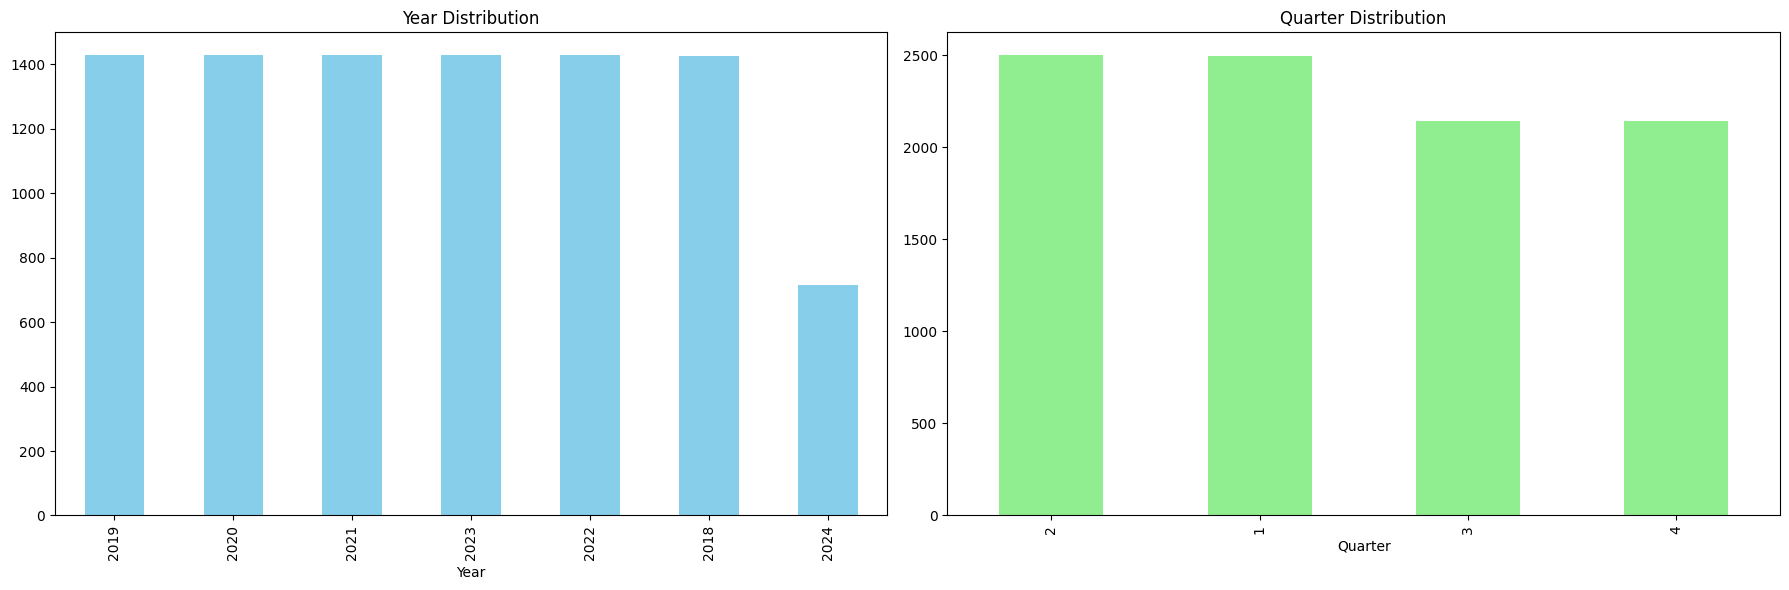

In [29]:
fig, axs = plt.subplots(1, 2, figsize=(18, 6))
# Plot for Year Distribution
df_ttp1['Year'].value_counts().plot.bar(ax=axs[0], color='skyblue')
axs[0].set_title('Year Distribution')

# Plot for Quarter Distribution
df_ttp1['Quarter'].value_counts().plot.bar(ax=axs[1], color='lightgreen')
axs[1].set_title('Quarter Distribution')

plt.tight_layout()
plt.show()

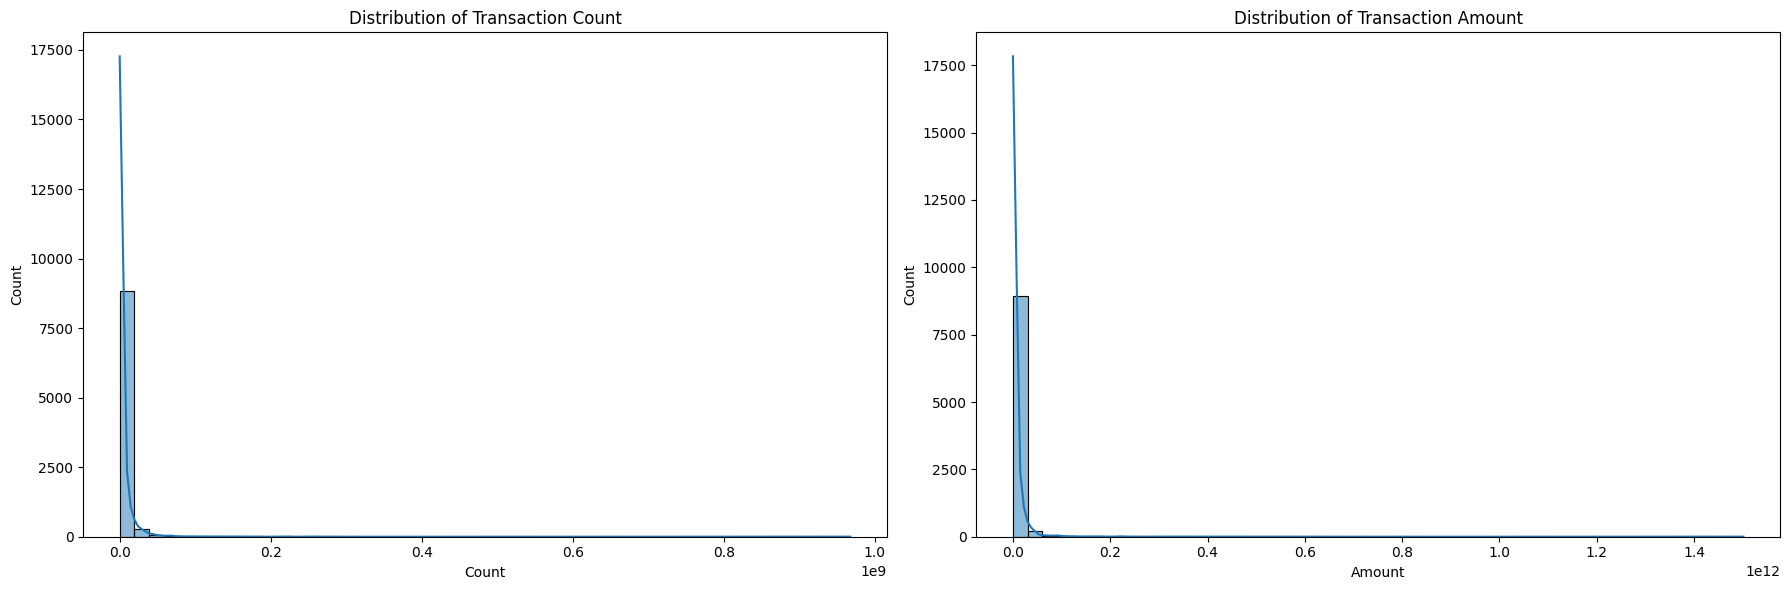

In [30]:
fig, axs = plt.subplots(1, 2, figsize=(18, 6))
# Plot for Distribution of Transaction Count
sns.histplot(df_ttp1['Count'], bins=50, kde=True, ax=axs[0])
axs[0].set_title('Distribution of Transaction Count')

# Plot for Distribution of Transaction Amount
sns.histplot(df_ttp1['Amount'], bins=50, kde=True, ax=axs[1])
axs[1].set_title('Distribution of Transaction Amount')

plt.tight_layout()
plt.show()

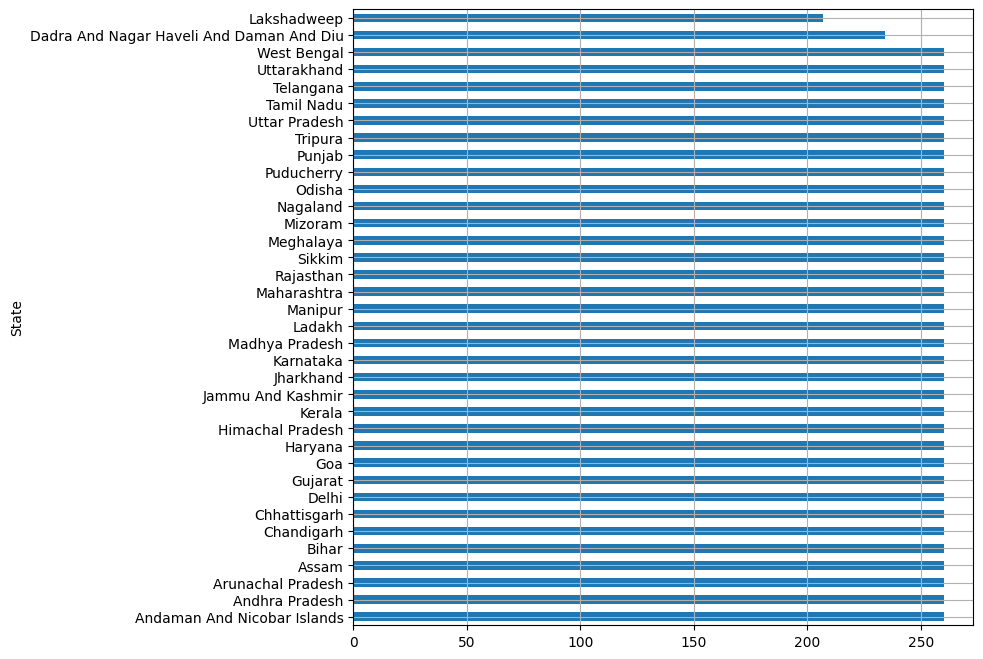

In [31]:
plt.figure(figsize=(8, 8))
df_ttp1['State'].value_counts().plot.barh()
plt.grid(True)

In [32]:
#correlation analysis between numerical columns
df_numeric = df_ttp1.select_dtypes(include=[float, int])
df1 = df_numeric.corr()
print(df1)

           Count    Amount
Count   1.000000  0.988491
Amount  0.988491  1.000000


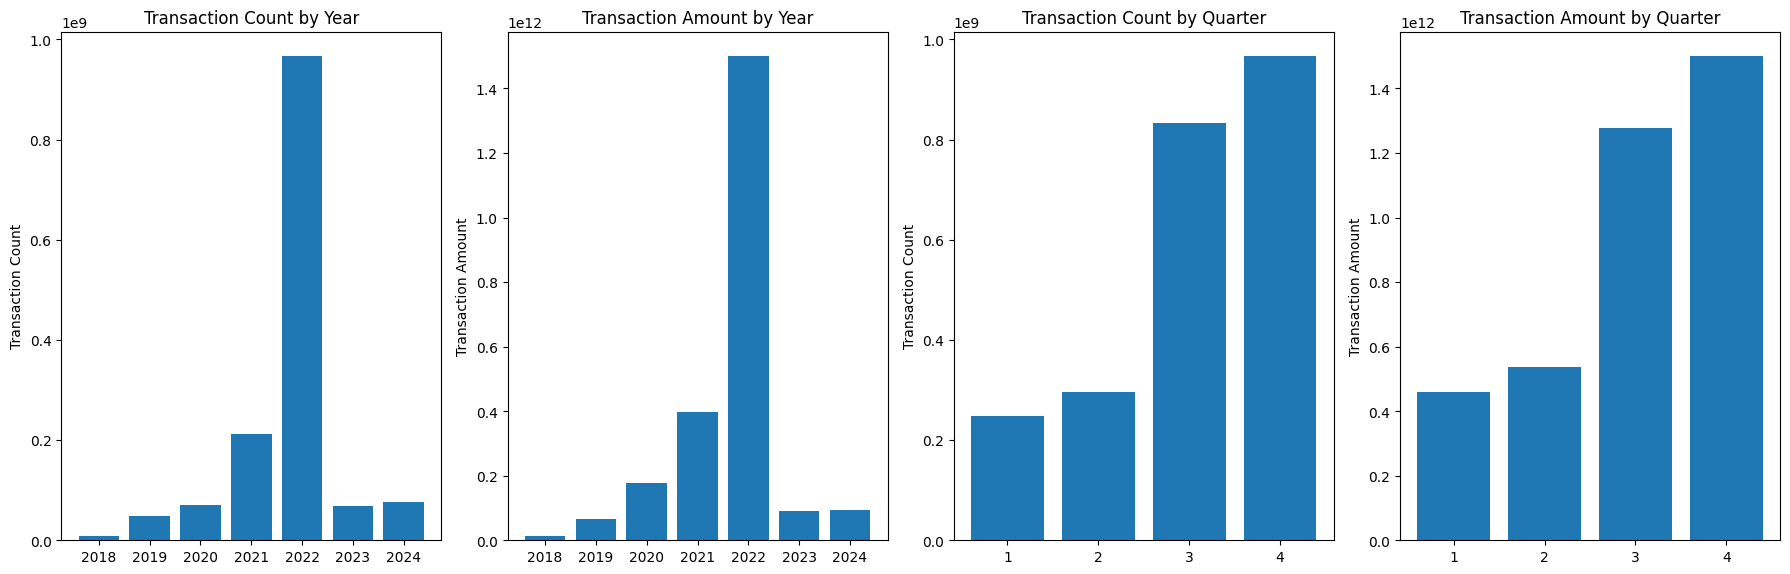

In [33]:
fig, axes = plt.subplots(1, 4, figsize=(18, 6))

axes[0].bar(df_ttp1["Year"], df_ttp1["Count"])
axes[0].set_title('Transaction Count by Year')
axes[0].set_ylabel('Transaction Count')

axes[1].bar(df_ttp1["Year"], df_ttp1["Amount"])
axes[1].set_title('Transaction Amount by Year')
axes[1].set_ylabel('Transaction Amount')

axes[2].bar(df_ttp1["Quarter"], df_ttp1["Count"])
axes[2].set_title('Transaction Count by Quarter')
axes[2].set_ylabel('Transaction Count')

axes[3].bar(df_ttp1["Quarter"], df_ttp1["Amount"])
axes[3].set_title('Transaction Amount by Quarter')
axes[3].set_ylabel('Transaction Amount')

plt.tight_layout()
plt.show()

In [34]:
# Creating cross table using groupby
cross_table = df_ttp1.groupby(['State']).agg(
    Total_Transaction_count=('Count', 'sum'),
    Total_Transaction_amount=('Amount', 'sum')
).reset_index()
cross_table = cross_table.sort_values(by='Total_Transaction_amount', ascending=False)

display(cross_table)

,State,Total_Transaction_count,Total_Transaction_amount
31,Telangana,6233062862,9.804082e+12
15,Karnataka,5345112885,6.468488e+12
20,Maharashtra,5066827689,6.260994e+12
28,Rajasthan,3033417537,4.639144e+12
8,Delhi,2909451549,4.192749e+12
19,Madhya Pradesh,2774451096,3.844340e+12
33,Uttar Pradesh,2388583410,2.973044e+12
1,Andhra Pradesh,1463018942,2.749235e+12
4,Bihar,1551164713,2.567184e+12
11,Haryana,1569162967,1.968102e+12


In [35]:
# Step 1: Calculate the total transaction amount for each state
state_agg = df_ttp1.groupby(['State']).agg(
    Total_Transaction_Amount_State=('Amount', 'sum')
).reset_index()

# Step 2: Calculate the total transaction amount for each pincode within each state
pincode_agg = df_ttp1.groupby(['State', 'Pincode']).agg(
    Total_Transaction_Amount_Pincode=('Amount', 'sum')
).reset_index()

# Step 3: Identify the pincode with the highest transaction amount for each state
idx = pincode_agg.groupby(['State'])['Total_Transaction_Amount_Pincode'].idxmax()
top_pincodes = pincode_agg.loc[idx].rename(columns={'Pincode': 'Top_Pincode'})

# Step 4: Merge the state-level and pincode-level data
cross_table = state_agg.merge(top_pincodes[['State', 'Top_Pincode', 'Total_Transaction_Amount_Pincode']], on='State')

# Sort by the total transaction amount in the state in descending order
cross_table = cross_table.sort_values(by='Total_Transaction_Amount_State', ascending=False)

# Display the final table
display(cross_table)

,State,Total_Transaction_Amount_State,Top_Pincode,Total_Transaction_Amount_Pincode
31,Telangana,9.804082e+12,500001,2.930982e+12
15,Karnataka,6.468488e+12,560001,2.151967e+12
20,Maharashtra,6.260994e+12,411004,1.800762e+12
28,Rajasthan,4.639144e+12,302016,1.528114e+12
8,Delhi,4.192749e+12,110006,1.854606e+12
19,Madhya Pradesh,3.844340e+12,462008,1.052087e+12
33,Uttar Pradesh,2.973044e+12,226004,6.278315e+11
1,Andhra Pradesh,2.749235e+12,530026,3.303686e+11
4,Bihar,2.567184e+12,800001,1.441519e+12
11,Haryana,1.968102e+12,122001,2.896679e+11


In [36]:
df_tup = pd.read_csv(r"C:\Users\hi\Downloads\PHONE PE\Extracted_tables\9 Top User Pincode.csv")

In [37]:
print("shape",df_tup.shape)
display(df_tup.head(5))
print("_______________________________________________________________________________________________________")
print("---- CHECKING NULL VALUES ----")
print(df_tup.isnull().sum()) 
print("_______________________________________________________________________________________________________")
print("---- DROP NULL VALUES ----")
display(df_tup.drop_duplicates())
print("_______________________________________________________________________________________________________")
print("---- SUMMARY STATISTICS ----")
display(df_tup.describe())
print("_______________________________________________________________________________________________________")
print("---- CHECKING DATATYPES ----")
print(df_tup.dtypes)

shape (9282, 5)


,State,Year,Quarter,Pincode,Registered_Users
0,Andaman And Nicobar Islands,2018,1,744103,1608
1,Andaman And Nicobar Islands,2018,1,744101,1108
2,Andaman And Nicobar Islands,2018,1,744105,1075
3,Andaman And Nicobar Islands,2018,1,744102,1006
4,Andaman And Nicobar Islands,2018,1,744104,272


_______________________________________________________________________________________________________
---- CHECKING NULL VALUES ----
State               0
Year                0
Quarter             0
Pincode             0
Registered_Users    0
dtype: int64
_______________________________________________________________________________________________________
---- DROP NULL VALUES ----


,State,Year,Quarter,Pincode,Registered_Users
0,Andaman And Nicobar Islands,2018,1,744103,1608
1,Andaman And Nicobar Islands,2018,1,744101,1108
2,Andaman And Nicobar Islands,2018,1,744105,1075
3,Andaman And Nicobar Islands,2018,1,744102,1006
4,Andaman And Nicobar Islands,2018,1,744104,272
...,...,...,...,...,...
9277,West Bengal,2024,2,700015,136835
9278,West Bengal,2024,2,721101,132872
9279,West Bengal,2024,2,742304,131799
9280,West Bengal,2024,2,700150,128721


_______________________________________________________________________________________________________
---- SUMMARY STATISTICS ----


,Year,Quarter,Pincode,Registered_Users
count,9282.000000,9282.000000,9282.000000,9.282000e+03
mean,2020.769231,2.423077,519382.759642,9.693584e+04
std,1.887462,1.115445,246651.371780,1.226697e+05
min,2018.000000,1.000000,110001.000000,1.000000e+00
25%,2019.000000,1.000000,263153.000000,1.288025e+04
50%,2021.000000,2.000000,530026.000000,4.354400e+04
75%,2022.000000,3.000000,781001.000000,1.384628e+05
max,2024.000000,4.000000,846004.000000,1.021560e+06


_______________________________________________________________________________________________________
---- CHECKING DATATYPES ----
State               object
Year                 int64
Quarter              int64
Pincode              int64
Registered_Users     int64
dtype: object


In [38]:
df_tup1 = df_tup.copy()
df_tup1['Year']=df_tup1['Year'].astype(str)
df_tup1['Quarter']=df_tup1['Quarter'].astype(str)
df_tup1['Pincode']=df_tup1['Pincode'].astype(int).astype(str)
display(df_tup1.dtypes)

State               object
Year                object
Quarter             object
Pincode             object
Registered_Users     int64
dtype: object

In [39]:
df_tup1.head(5)

,State,Year,Quarter,Pincode,Registered_Users
0,Andaman And Nicobar Islands,2018,1,744103,1608
1,Andaman And Nicobar Islands,2018,1,744101,1108
2,Andaman And Nicobar Islands,2018,1,744105,1075
3,Andaman And Nicobar Islands,2018,1,744102,1006
4,Andaman And Nicobar Islands,2018,1,744104,272


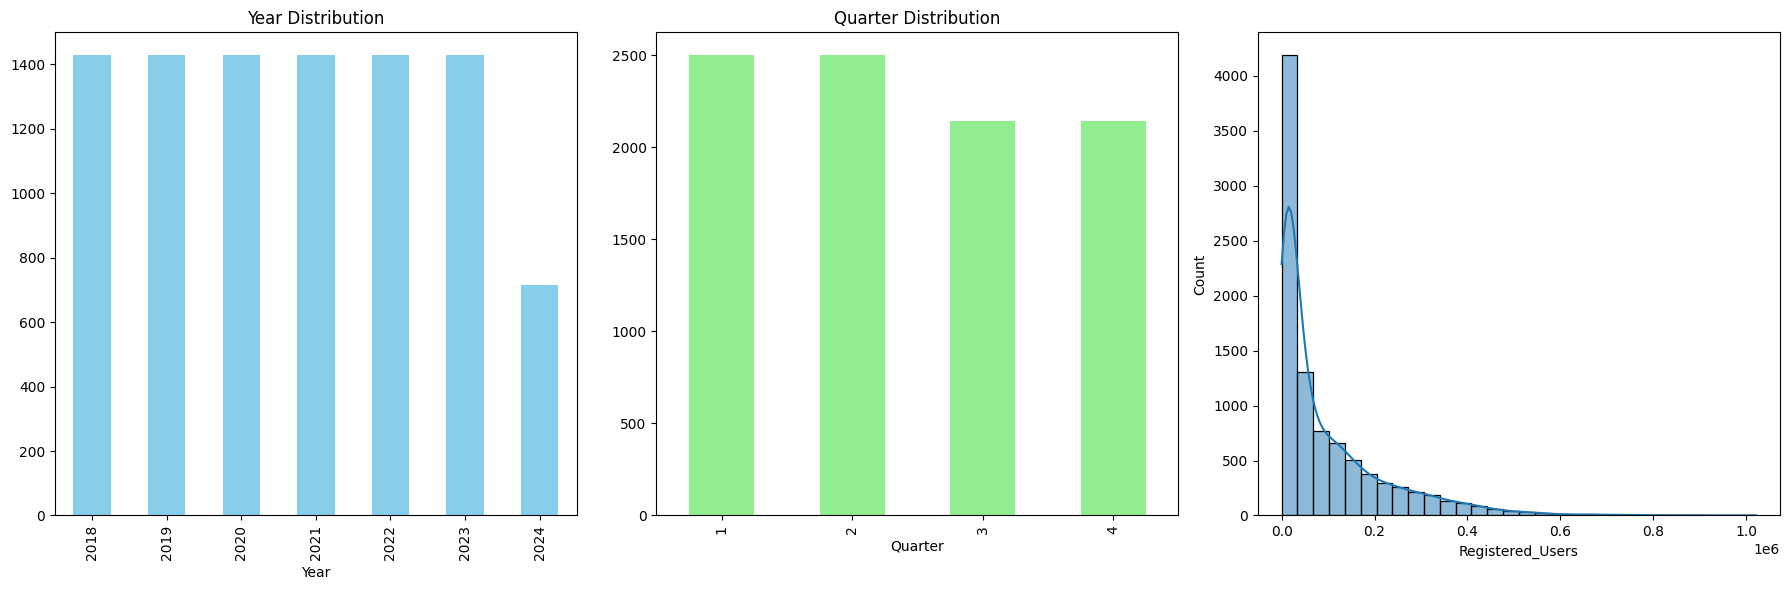

In [40]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6))
df_tup1['Year'].value_counts().plot.bar(ax=axs[0], color='skyblue')
axs[0].set_title('Year Distribution')

df_tup1['Quarter'].value_counts().plot.bar(ax=axs[1], color='lightgreen')
axs[1].set_title('Quarter Distribution')

sns.histplot(df_tup1['Registered_Users'], bins=30, kde=True, ax=axs[2])
axes[2].set_title('Distribution of Registered users')

plt.tight_layout()
plt.show()

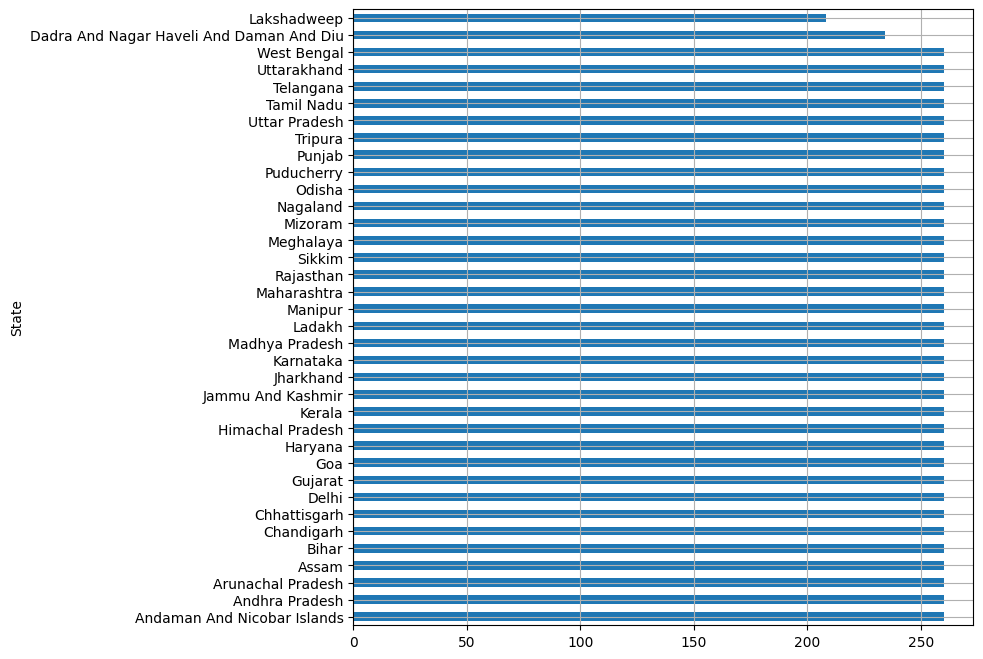

In [41]:
plt.figure(figsize=(8, 8))
df_tup1['State'].value_counts().plot.barh()
plt.grid(True)

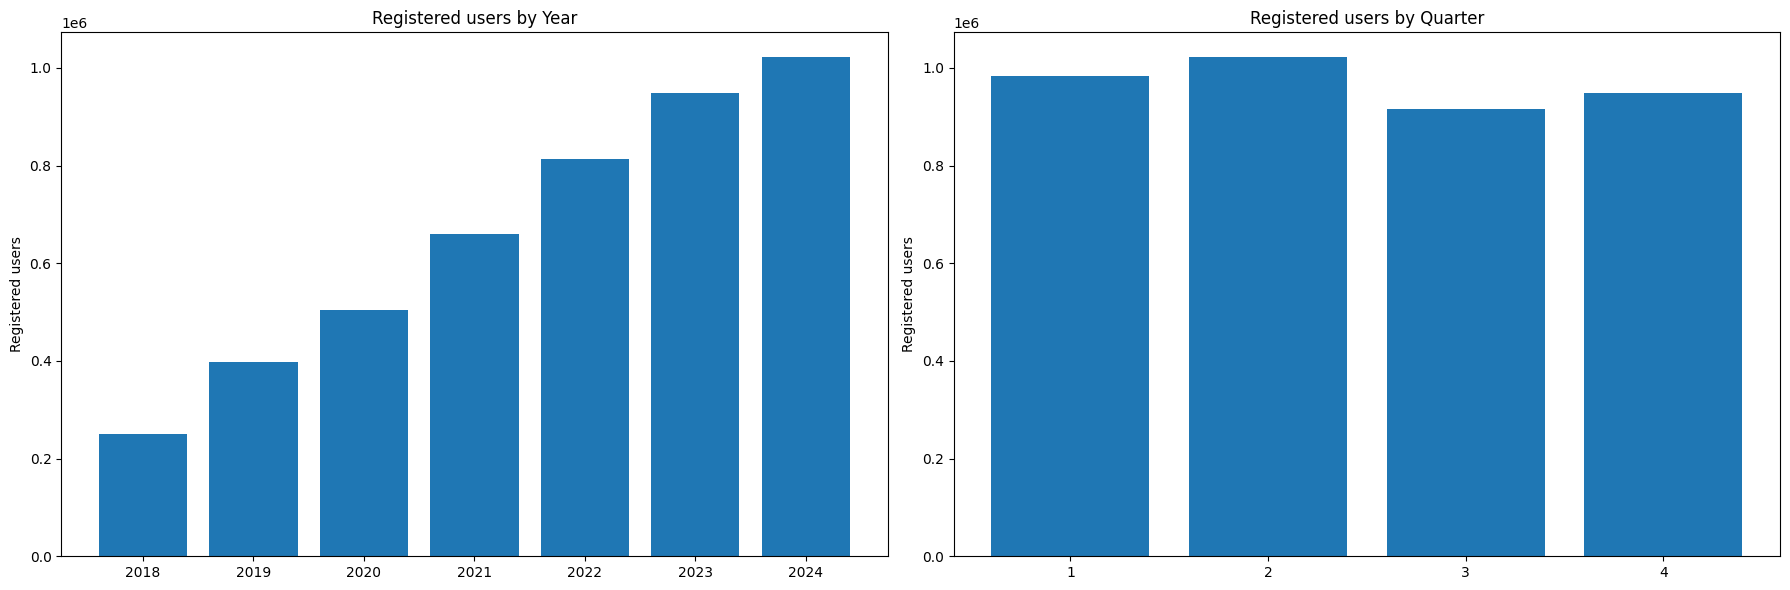

In [42]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

axes[0].bar(df_tup1["Year"], df_tup1["Registered_Users"])
axes[0].set_title('Registered users by Year')
axes[0].set_ylabel('Registered users')

axes[1].bar(df_tup1["Quarter"], df_tup1["Registered_Users"])
axes[1].set_title('Registered users by Quarter')
axes[1].set_ylabel('Registered users')

plt.tight_layout()
plt.show()

In [43]:
# Step 1: Calculate the total users for each state
state_agg = df_tup1.groupby(['State']).agg(
    Total_users_State=('Registered_Users', 'sum')
).reset_index()

# Step 2: Calculate the total users for each pincode within each state
pincode_agg = df_tup1.groupby(['State', 'Pincode']).agg(
    Total_users_Pincode=('Registered_Users', 'sum')
).reset_index()

# Step 3: Identify the pincode with the highest users for each state
idx = pincode_agg.groupby(['State'])['Total_users_Pincode'].idxmax()
top_pincodes = pincode_agg.loc[idx].rename(columns={'Pincode': 'Top_Pincode'})

# Step 4: Merge the state-level and pincode-level data
cross_table = state_agg.merge(top_pincodes[['State', 'Top_Pincode', 'Total_users_Pincode']], on='State')

# Sort by the total users in the state in descending order
cross_table = cross_table.sort_values(by='Total_users_State', ascending=False)

# Display the final table
display(cross_table)

,State,Total_users_State,Top_Pincode,Total_users_Pincode
8,Delhi,80104448,110059,12532101
15,Karnataka,73960197,560068,11693651
33,Uttar Pradesh,71232188,201301,14982830
20,Maharashtra,71220970,421302,10649417
11,Haryana,61140068,122001,9961317
31,Telangana,58367890,500072,10282037
28,Rajasthan,53656303,302012,8060333
10,Gujarat,44445427,395006,8261264
19,Madhya Pradesh,42375591,482002,5458031
4,Bihar,39013604,800001,8039552
